In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow.compat.v1 as tf 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [2]:
sns.set(style='whitegrid',palette='muted',font_scale=1.5)

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
columns = [ 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('/content/drive/MyDrive/transition.csv', header = None, names = columns)

In [6]:
df.head()

,activity,timestamp,x-axis,y-axis,z-axis
0,sitting to lying,49126762313000,5.979332,10.501288,7.123442
1,sitting to lying,49126862258000,-0.572055,-6.129157,-9.112013
2,sitting to lying,49126972305000,-5.012288,13.021052,-5.747787
3,sitting to lying,49127082290000,1.920469,15.785983,1.416516
4,sitting to lying,49127192306000,2.792171,3.146300,1.416516


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   activity   964 non-null    object 
 1   timestamp  964 non-null    int64  
 2   x-axis     964 non-null    float64
 3   y-axis     964 non-null    float64
 4   z-axis     964 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 37.8+ KB


In [8]:
v1 = lambda x:float(x[1:-1])

In [9]:
countOfActivity = df['activity'].value_counts()
print(countOfActivity)

Standing to lying      170
standing to sitting    169
sitting to lying       158
Sitting to standing    157
lying to sitting       156
Walking to sitting     154
Name: activity, dtype: int64


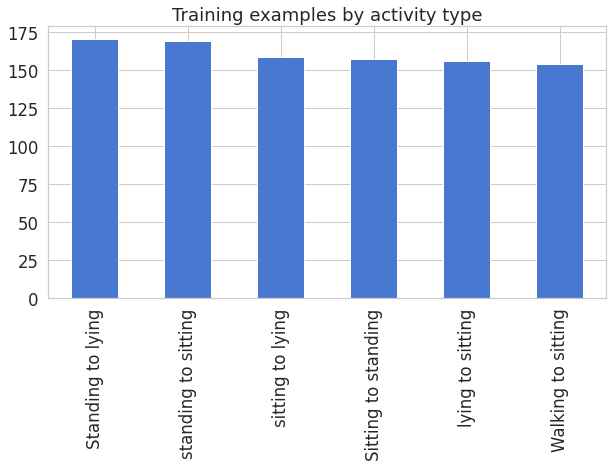

In [10]:
countOfActivity.plot(kind = 'bar', title = 'Training examples by activity type' , figsize = (10,5));

In [11]:
def plot_activity(activity,df):
  extractRowsofActivity = (df['activity']==activity)
  data=df[extractRowsofActivity]
  data=data[['x-axis', 'y-axis', 'z-axis']]
  data=data[:150]
  ax=data.plot(subplots=True, figsize=(14,8), title=activity)

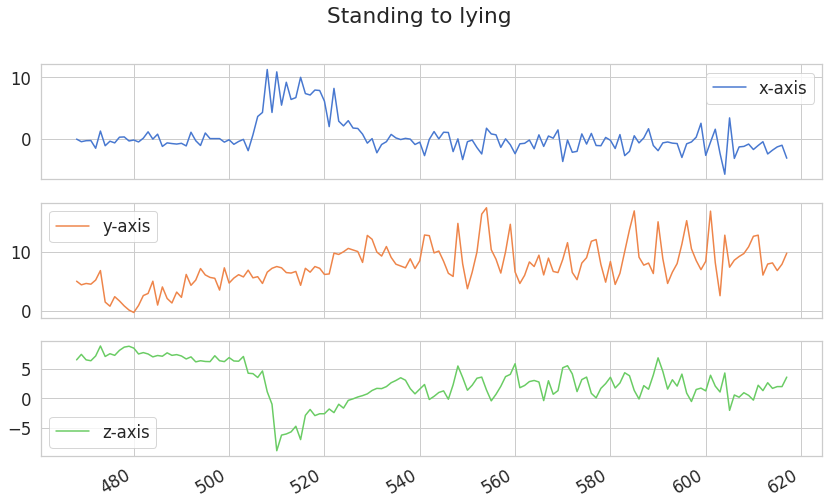

In [12]:
plot_activity("Standing to lying" , df)

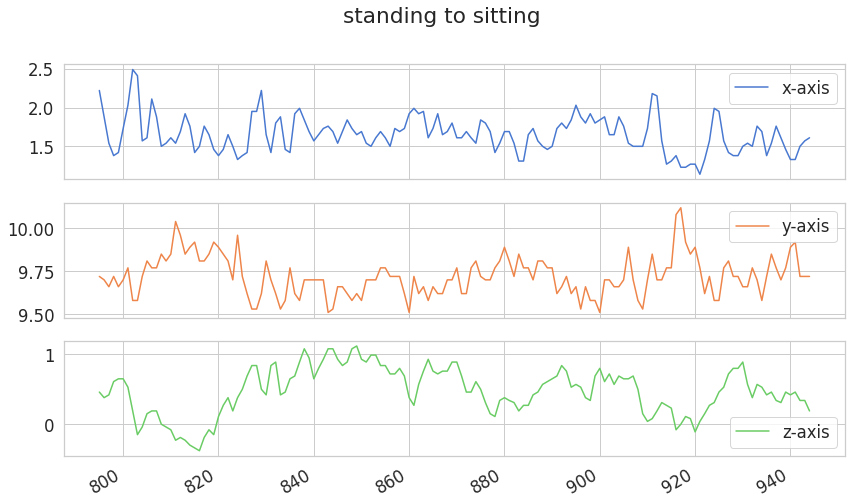

In [13]:
plot_activity("standing to sitting" , df)

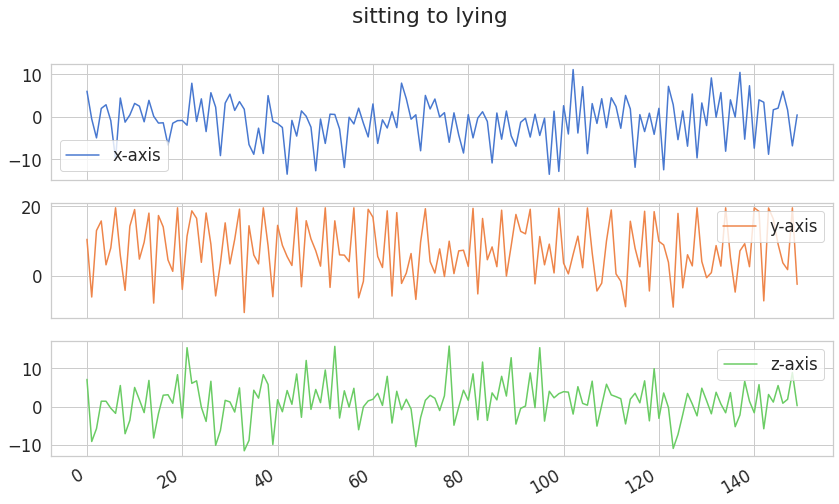

In [14]:
plot_activity("sitting to lying" , df)

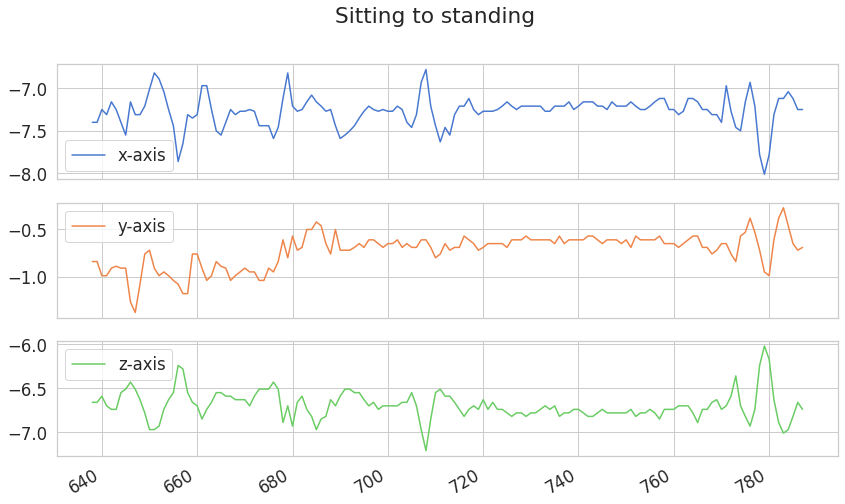

In [15]:
plot_activity("Sitting to standing" , df)

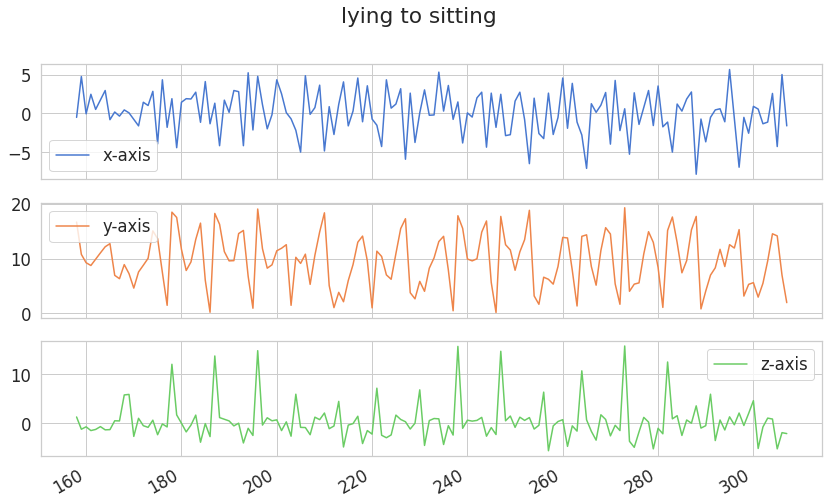

In [16]:
plot_activity("lying to sitting" , df)

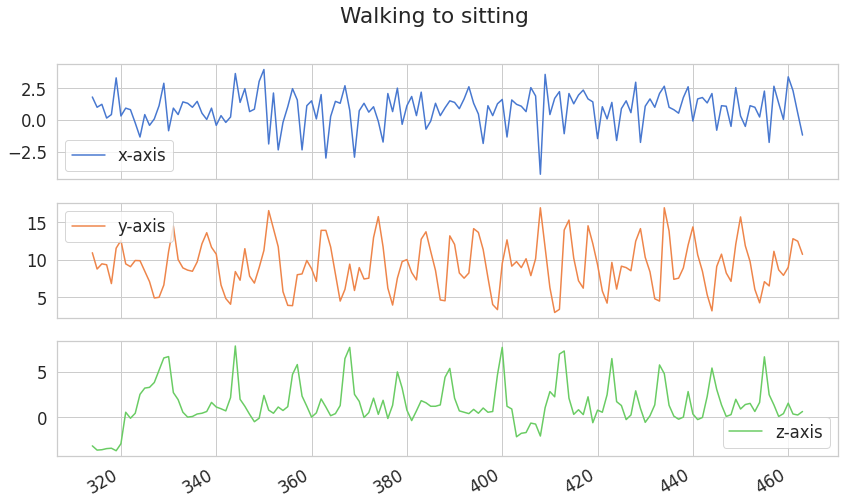

In [17]:
plot_activity("Walking to sitting" , df)

In [18]:
N_TIME_STEPS = 30
N_FEATURES = 3
step = 10
segments = []
labels = []
for i in range(0,len(df) - N_TIME_STEPS, step):
  xs = df['x-axis'].values[i: i + N_TIME_STEPS]
  ys = df['y-axis'].values[i: i + N_TIME_STEPS]
  zs = df['z-axis'].values[i: i + N_TIME_STEPS]
  label = stats.mode(df['activity'][i: i + N_TIME_STEPS])
  label = label[0][0]
  segments.append([xs,ys,zs])
  labels.append(label)

In [19]:
np.array(segments).shape

(94, 3, 30)

In [20]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
reshaped_segments.shape

(94, 30, 3)

In [21]:
labels = np.asarray(pd.get_dummies(labels), dtype= np.float32)

In [22]:
print(labels)
print(labels.shape)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0.

In [23]:
RANDOM_SEED = 42

In [24]:
x_train, x_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.3, random_state=RANDOM_SEED)

In [25]:
len(x_train)

65

In [26]:
len(x_test)



29

In [27]:
N_CLASSES = 6
N_HIDDEN_UNITS = 64

In [28]:
tf.compat.v1.disable_eager_execution()

def create_LSTM_model(inputs):
  w = { 
      'hidden': tf.Variable(tf.random.normal([N_FEATURES,  N_HIDDEN_UNITS])),
       'output': tf.Variable(tf.random.normal([N_HIDDEN_UNITS, N_CLASSES]))
  }
  biases = {
      'hidden': tf.Variable(tf.compat.v1.random_normal([N_HIDDEN_UNITS], mean=1.0)),
      'output': tf.Variable(tf.compat.v1.random_normal([N_CLASSES]))
  }
  x = tf.transpose(inputs,[1,0,2])
  x = tf.reshape(x, [-1, N_FEATURES])
  hidden = tf.nn.relu(tf.matmul(x, w['hidden']) + biases['hidden'])
  hidden = tf.split(hidden, N_TIME_STEPS, 0)

  lstm_layers = [tf.compat.v1.nn.rnn_cell.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
  lstm_layers = tf.compat.v1.nn.rnn_cell.MultiRNNCell(lstm_layers)

  outputs, _ = tf.compat.v1.nn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

  lstm_last_output = outputs[-1]

  return tf.matmul(lstm_last_output, w['output']) + biases['output']
  

In [29]:
tf.compat.v1.reset_default_graph()

x = tf.compat.v1.placeholder(tf.float32, [None , N_TIME_STEPS, N_FEATURES], name="input" )
y = tf.compat.v1.placeholder(tf.float32,  [None , N_CLASSES])

In [30]:
pred_Y = create_LSTM_model(x)
pred_softmax = tf.nn.softmax(pred_Y, name="y_")

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:756: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  shape=[input_depth + h_depth, 4 * self._num_units])
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:760: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=tf.compat.v1.zeros_initializer(dtype=self.dtype))


In [31]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in  tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = y)) + l2


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [32]:
LEARNING_RATE = 0.00025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(y, 1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [33]:
N_EPOCHS = 50
BATCH_SIZE = 1024

saver = tf.train.Saver()

history = dict(train_loss=[],
                     train_acc=[],
                     test_loss=[],
                     test_acc=[])
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(x_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1, BATCH_SIZE)):
        sess.run(optimizer, feed_dict={x: x_train[start:end],
                                   y: y_train[start:end]})
    
    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            x: x_train, y:y_train})
    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            x:x_test, y:y_test})
    
    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i == 1 or i % 10 == 0:
      print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test}')

prediction, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict = {x: x_test, y:y_test})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')




epoch: 1 test accuracy: 1.0 loss: 3.165830373764038
epoch: 10 test accuracy: 1.0 loss: 3.165830373764038
epoch: 20 test accuracy: 1.0 loss: 3.165830373764038
epoch: 30 test accuracy: 1.0 loss: 3.165830373764038
epoch: 40 test accuracy: 1.0 loss: 3.165830373764038
epoch: 50 test accuracy: 1.0 loss: 3.165830373764038

final results: accuracy: 1.0 loss: 3.165830373764038


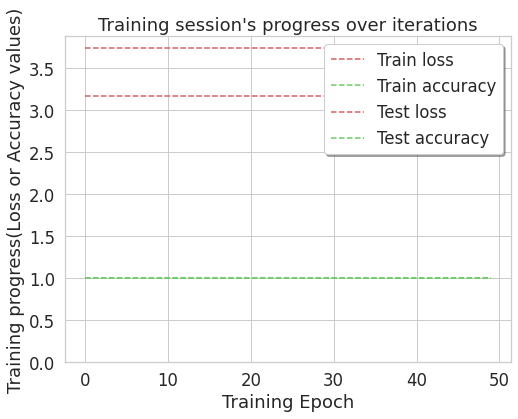

In [36]:
plt.figure(figsize=(8,6))

plt.plot(np.array(history['train_loss']),"r--",label = "Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r--", label="Test loss")
plt.plot(np.array(history['test_acc']), "g--", label = "Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training progress(Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()

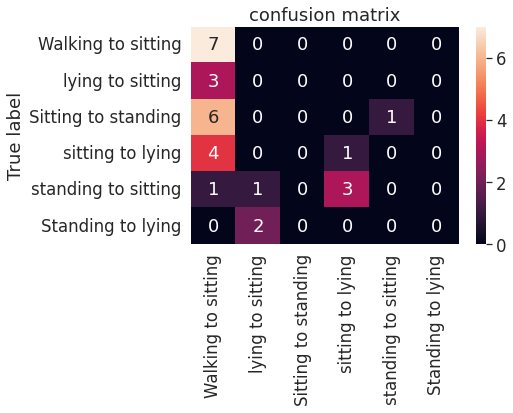

In [40]:
LABELS = ['Walking to sitting','lying to sitting','Sitting to standing','sitting to lying','standing to sitting','Standing to lying']

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(prediction, axis=1)
confusion_matrix= metrics.confusion_matrix(max_test,max_predictions)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot =True, fmt="d");
plt.title("confusion matrix")
plt.ylabel('True label')
plt.show()